# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

We will try to explore the data set to understand Airbnb business.We will be covering the following things in this kernel.

1.Data Preprocesing 

2.Exploratory Data Analysis(EDA)

3.Model Built 

4.Model Evaluaion 

5.Conclusion



This is a kernel in process and I will be updating the kernel in coming days.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# 1.Data Exploration

**Importing the python module**

In [2]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [3]:
data=pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Summary of Dataset

In [5]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])
print('\nFeatures :\n     :',data.columns.tolist())
print('\nMissing values    :',data.isnull().values.sum())
print('\nUnique values :  \n',data.nunique())

Rows     : 48895
Columns  : 16

Features :
     : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 20141

Unique values :  
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: i

### Missing Data

In [6]:
data.shape

(48895, 16)

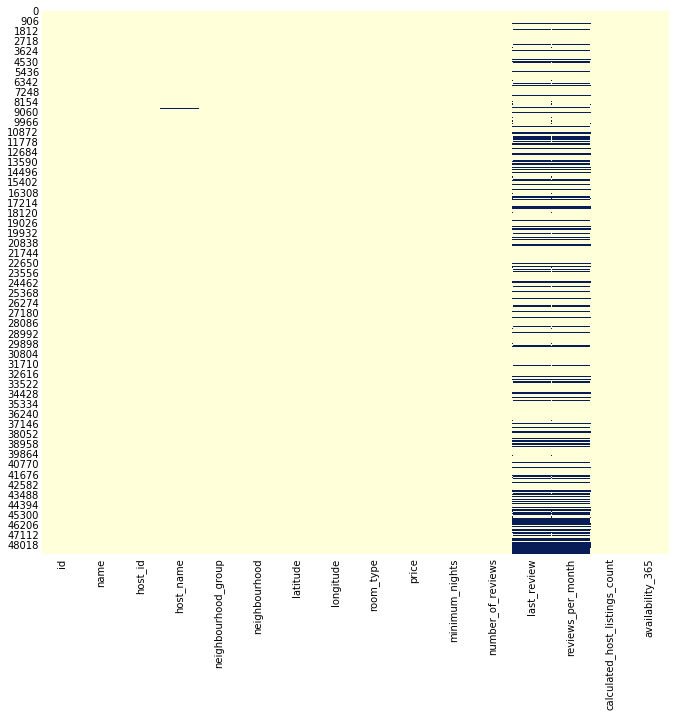

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

The dark horizontal lines show the missing values in the data set.We have more missing values in the column last_review and reviews_per_month.

### Count and Percentage of Missing Values

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum())*100)/data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

Total    Percent
reviews_per_month               10052  20.558339
last_review                     10052  20.558339
host_name                          21   0.042949
name                               16   0.032723
availability_365                    0   0.000000
calculated_host_listings_count      0   0.000000
number_of_reviews                   0   0.000000
minimum_nights                      0   0.000000
price                               0   0.000000
room_type                           0   0.000000
longitude                           0   0.000000
latitude                            0   0.000000
neighbourhood                       0   0.000000
neighbourhood_group                 0   0.000000
host_id                             0   0.000000
id                                  0   0.000000

Here we are getting the count and the percentage of missing values.We can see that 20% of the values are missing in the columns reviews_per_month and last_review.

### Features having missing values

In [9]:
#make a list of the variables that contain missing values
vars_with_na=[var for var in data.columns if data[var].isnull().sum()>1]

#print the variable name and the percentage of missing values 
for var in vars_with_na:
    print(var,np.round(data[var].isnull().mean(),3),'% missing values')

name 0.0 % missing values
host_name 0.0 % missing values
last_review 0.206 % missing values
reviews_per_month 0.206 % missing values


### Getting Basic Stats from the data

In [10]:
data.describe().T

count          mean           std  \
id                              48895.0  1.901714e+07  1.098311e+07   
host_id                         48895.0  6.762001e+07  7.861097e+07   
latitude                        48895.0  4.072895e+01  5.453008e-02   
longitude                       48895.0 -7.395217e+01  4.615674e-02   
price                           48895.0  1.527207e+02  2.401542e+02   
minimum_nights                  48895.0  7.029962e+00  2.051055e+01   
number_of_reviews               48895.0  2.327447e+01  4.455058e+01   
reviews_per_month               38843.0  1.373221e+00  1.680442e+00   
calculated_host_listings_count  48895.0  7.143982e+00  3.295252e+01   
availability_365                48895.0  1.127813e+02  1.316223e+02   

                                       min           25%           50%  \
id                              2539.00000  9.471945e+06  1.967728e+07   
host_id                         2438.00000  7.822033e+06  3.079382e+07   
latitude                          40.49979  4.069010e+01  4.072307e+01   
longitude                        -74.24442 -7.398307e+01 -7.395568e+01   
price                              0.00000  6.900000e+01  1.060000e+02   
minimum_nights                     1.00000  1.000000e+00  3.000000e+00   
number_of_reviews                  0.00000  1.000000e+00  5.000000e+00   
reviews_per_month                  0.01000  1.900000e-01  7.200000e-01   
calculated_host_listings_count     1.00000  1.000000e+00  1.000000e+00   
availability_365                   0.00000  0.000000e+00  4.500000e+01   

                                         75%           max  
id                              2.915218e+07  3.648724e+07  
host_id                         1.074344e+08  2.743213e+08  
latitude                        4.076311e+01  4.091306e+01  
longitude                      -7.393627e+01 -7.371299e+01  
price                           1.750000e+02  1.000000e+04  
minimum_nights                  5.000000e+00  1.250000e+03  
number_of_reviews               2.400000e+01  6.290000e+02  
reviews_per_month               2.020000e+00  5.850000e+01  
calculated_host_listings_count  2.000000e+00  3.270000e+02  
availability_365                2.270000e+02  3.650000e+02

1.From the above table we can see than the mean price of rooms is 157 dollars.The maximum price of a room is 10000 dollars

2.On an average people spend 7 days in rooms.This kind of indicates people prefer a week of holiday.From the data we can see some one stayed for 1250 days which is nealry 4 years.

### Correlation Plot

In [11]:
data.corr().style.background_gradient(cmap='coolwarm')
#No strong correlation except number_of_reviews vs reviews_per_month

So this is a colorful way of plotting a correlation plot.Generally Heat map is more frequntly used.

**Relation between missing values and the Price**

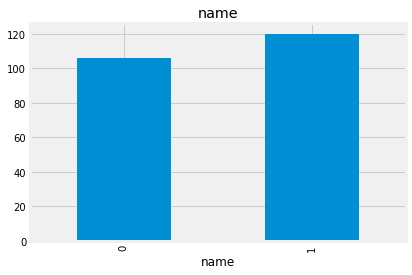

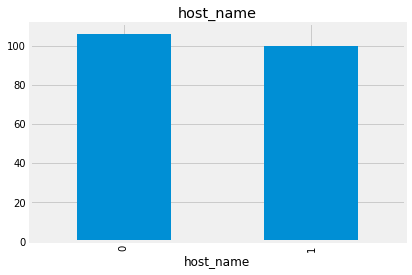

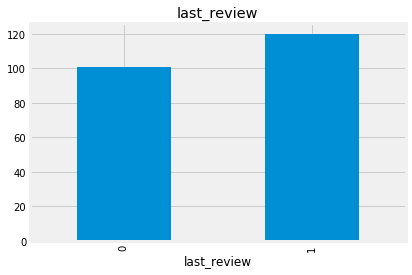

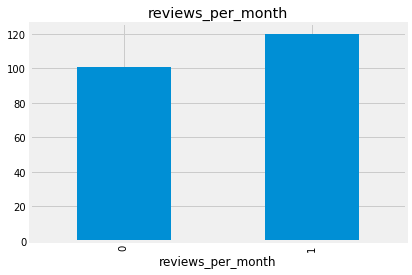

In [12]:
def analyse_na_value(df,var):
    df=df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or Zero otherwise 
    df[var]=np.where(df[var].isnull(),1,0)
    
    #Let's calculate the mean SalePrice where the information is missing or present 
    df.groupby(var)['price'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(data,var)

Generally the price is slightly more for the rows were the data is missing.This plots are generally used to find out if the features missing have an impact on the predicated value which is price in this case.If they have an impact on the predicted variable then we have to either input the missng values in case of numerical variable.In case of categorical variables we can create a new label.

# 2.EDA-Exploratory Data Analysis

## A] Neighborhood_group

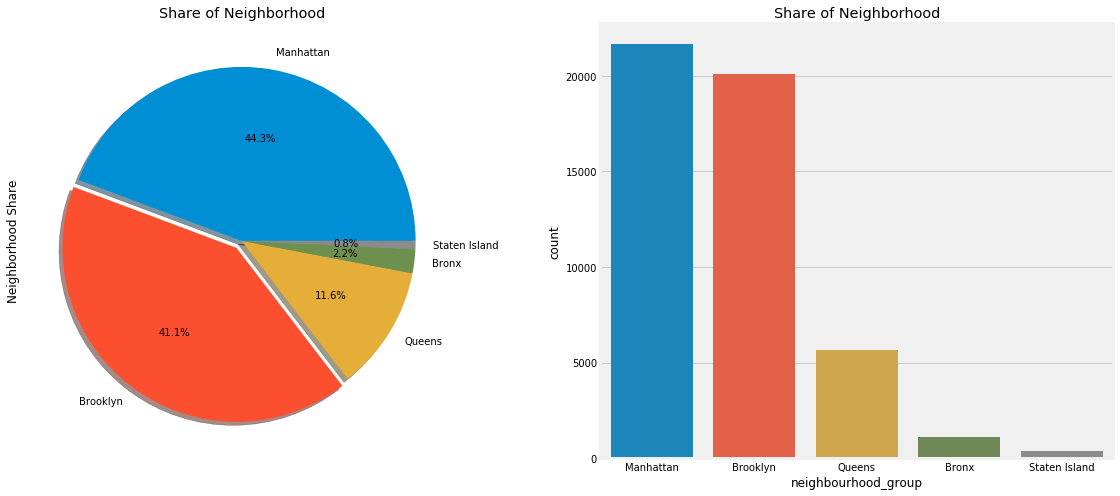

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=data,ax=ax[1],order=data['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

Manhatten and Brooklyn have the highest share of hotels.

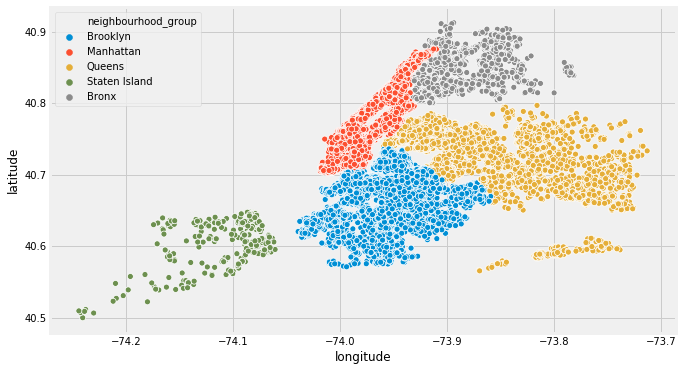

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.ioff()

From the points on the map we can see that there is more density in the Brooklyn and Manhattan.

### Lets See the Hotel Distribution in a Heat Map

In [15]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(data[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

The highest Density areas are marked in red and lowest density areas are marked in blue color.

## 2] Price

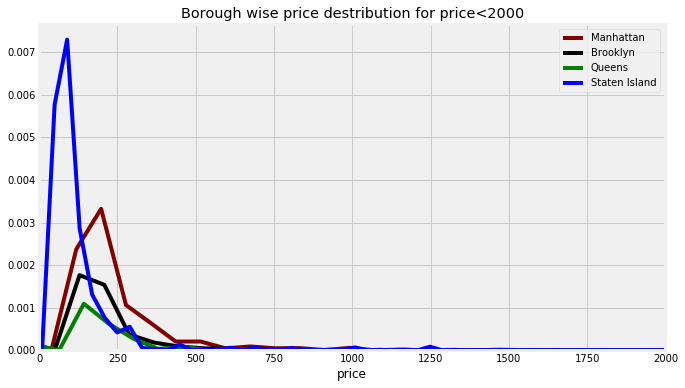

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(data[data.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(data[data.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(data[data.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(data[data.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(data[data.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

Area wise distribution of price shows that Manhattan has expensive and Staten Island has low priced rooms.

### Price Distribution of Brooklyn

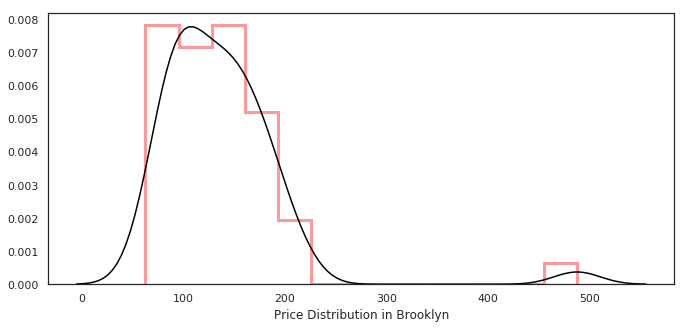

In [17]:
## setting style for our plots
sns.set(style="white", palette="spring", color_codes=True)
## ignore -- f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=True) -- ignore ##

## figure size with 10 width and 5 height
plt.figure(figsize=(10, 5))
## create dataframe "df1" with all the neighbourhood of Brooklyn and their price
df1 = data[data.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
## lets take mean of all the prices of neighbouhood
d = df1.groupby("neighbourhood").mean()
## distplot -> distribution plot
## axlabel == xlabel
## kde_kws -> kernel density estimate keyword arguments -> color="black"
## hist_kws -> histogram keyword arguments -> histogram type = step
sns.distplot(d,color='r',axlabel ="Price Distribution in Brooklyn",kde_kws={"color": "k"},
             hist_kws={"histtype":"step","linewidth": 3});
plt.ioff()
plt.plot();

Above graph show the techinique to get the price distribution for a single neighbourhood.We can see that for Brooklyn the peak price is around 100 dollars.The price mostly ranges in between 0 to 250 dollars.In some cases the price in Brooklyn is around 450-550 dollars.

### Boxplot of Price Distribution

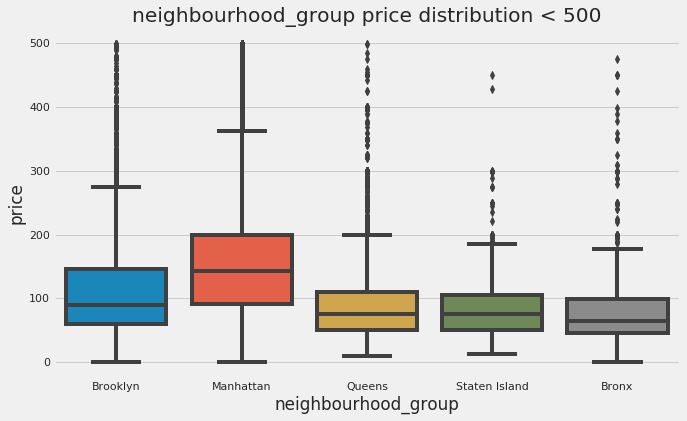

In [18]:
plt.style.use('fivethirtyeight')
ng = data[data.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 500")
plt.show()

Manhattan has the most expensive accomodation followed by Brooklyn.But we can see there are more outliers in the Queens,Staten Island and Bronx.

### Categorising Rooms Based on their Price

In [19]:
def rank_price(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'

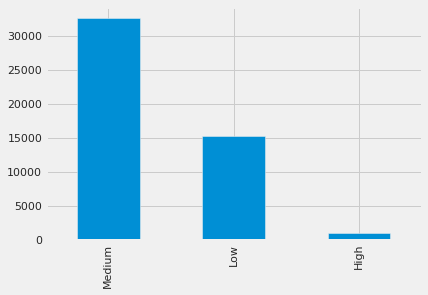

In [20]:
data['price'].apply(rank_price).value_counts().plot(kind='bar');

Here we hav categorised the rooms into three categories based on price.0-75,75-500 and 500+ as Low Medium abd High priced rooms.Most of the rooms fall in the Medium (75-200 $) category followed by Low and High range rooms.Very few people prefer to live in high priced rooms.

## C] Minimum Nights

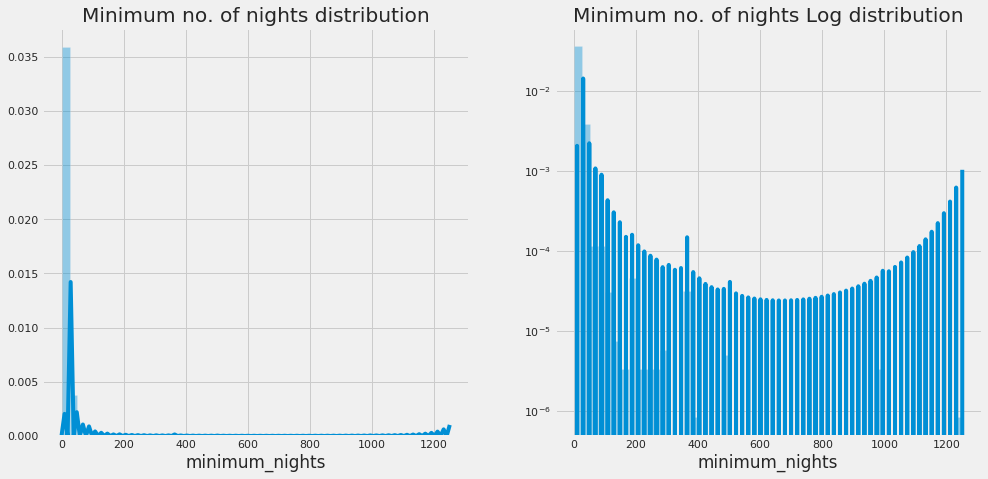

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(data.minimum_nights)
plt.title('Minimum no. of nights distribution')
plt.subplot(1,2,2)
sns.distplot(data.minimum_nights).set_yscale('log')
plt.title('Minimum no. of nights Log distribution')
pass

Here we have plotted the distribution plot with normal and log scale.In most cases the rooms are occupied for less than 100 days.

But as see from the log scale plot the rooms are occupied from 100 to 1200 days.Some cases the occupancy is in terms of years.

### Nights Booked

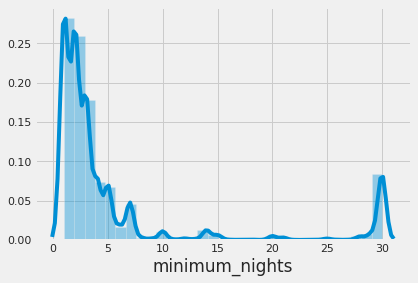

In [22]:
sns.distplot(data[(data['minimum_nights'] <= 30) & (data['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

We can see clearly that most books are for 1-2-3 days

## D]Availability

<Figure size 720x432 with 0 Axes>

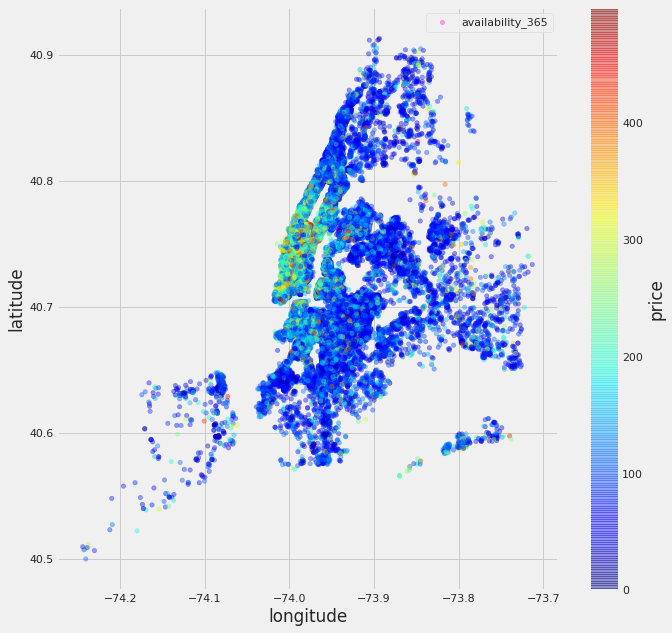

In [23]:
plt.figure(figsize=(10,6));
sub_6=data[data.price<500];
viz_4=sub_6.plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10));
viz_4.legend();
plt.ioff()
pass

Red color dots are the apartment or rooms with higher price.I have considered prices upto 300 $ to get a goo representation on the plot.We can see that Manhattan region has more expensive apartments.

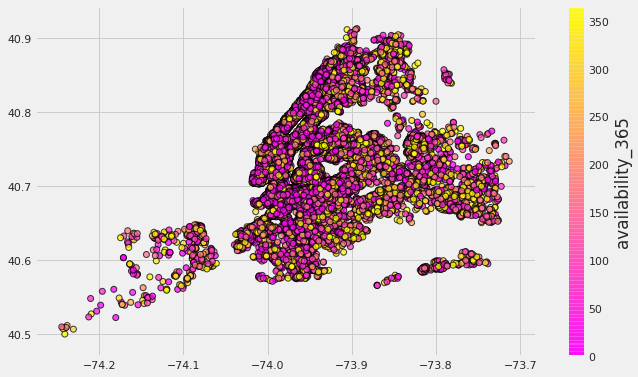

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(data.longitude, data.latitude, c=data.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

Yellow region on the map shows the places which have more room availabe throughout the year.So we book based on the region where more rooms are available there is possibility of getting cheaper rates.

## E]Neighbourhood

In [25]:
print ("Total Neighbourhoods: ", len(np.unique(data.neighbourhood)))

Total Neighbourhoods:  221


In [26]:
#using groupby to group two columns neighbourhood and price also find mean of price along with sorting the values and resetting index
df_top_prices_by_neighbourhood = data.groupby('neighbourhood').agg({'price': 'mean'}).sort_values('price').reset_index()

In [27]:
df_top_prices_by_neighbourhood.columns

Index(['neighbourhood', 'price'], dtype='object')

### Neighbourhood with Higher Mean Price

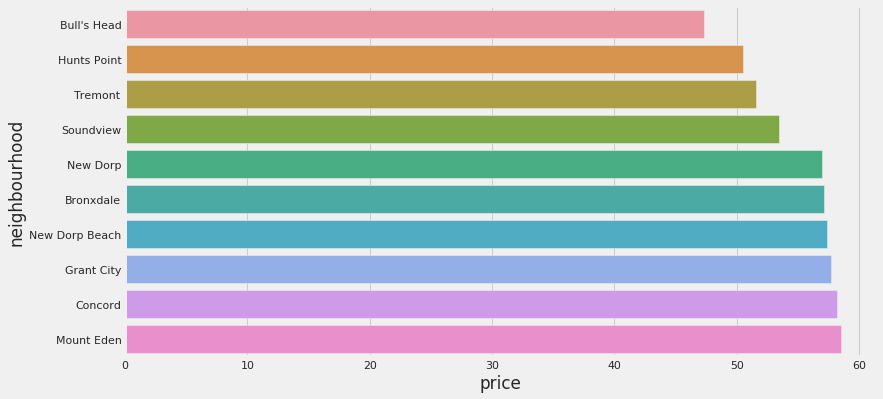

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=df_top_prices_by_neighbourhood.head(10))
plt.ioff()

We can see for the top 10 neighbourhoods the mean price is in the range 45 to 57 dollars.Mount Eden,Concord and Grant have higher mean prices.Bulls Head, Hunts Point and Tremont are the neighbourhoods with least price 

### Neighbourhood with Maximum Price

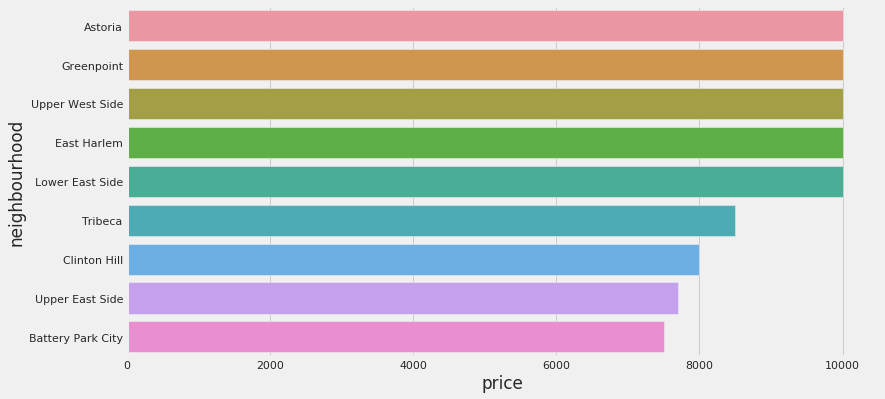

In [29]:
#method2
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=data.nlargest(10,['price']))
plt.ioff()

We can see that the top neighbourhoods are differnt when we consider Mean and Maximum Prices.Astoria,Greenpoint,SideEast and Harlem have the the most expensive rooms.This could be because these places are posh localities.

### Neighbourhoods with More Rooms

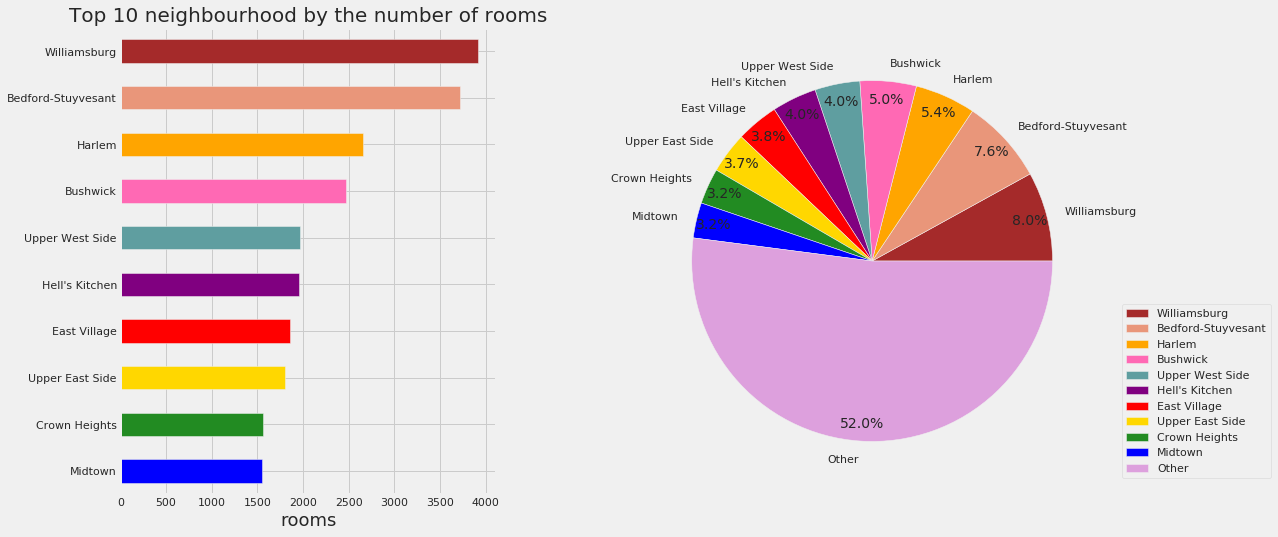

In [30]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
data.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)


count=data['neighbourhood'].value_counts()
groups=list(data['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

Williamsburg,Bedford-Stuyvesant and Hariem have highest number of rooms.

## F] Room Details

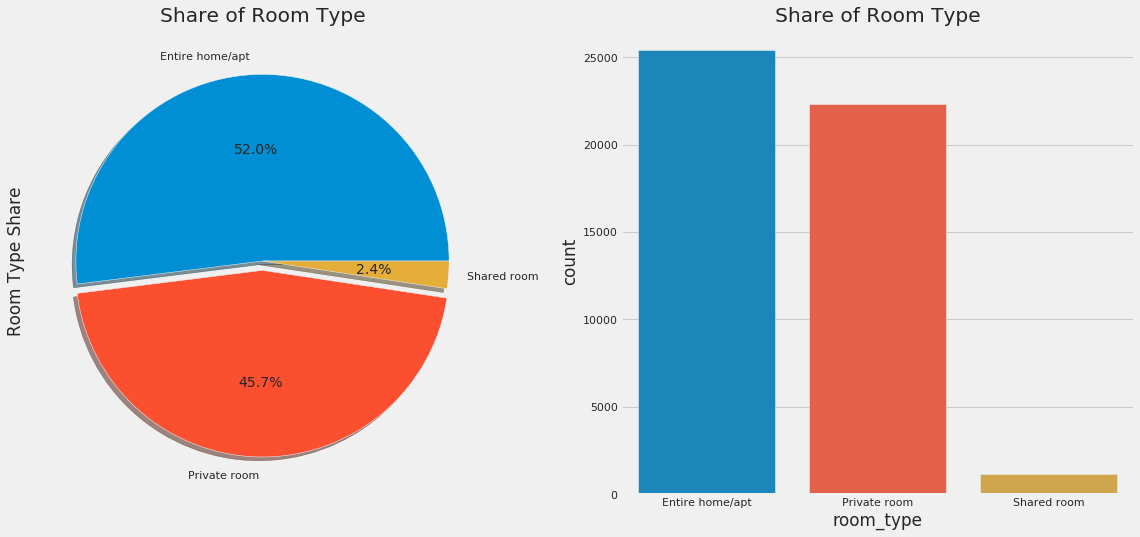

In [31]:
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=data,ax=ax[1],order=data['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

We can see than most people rent out entire apartment on airbnb followed by private room.This may also be an indicator people go on holidays and stay in airbnb with their family.Also possibility is people are listing more in Entire Apartment category.Very few people opt for shared rooms probably due to lack of privacy.

In [32]:
import plotly.offline as pyo
import plotly.graph_objs as go
roomdf = data.groupby('room_type').size()/data['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

Here we have plotted the same pie plot using plotly.TWe can see that Entire home apartment has highest share followed by private room and least prefered is shared room

### Room Types by Neighbourhood

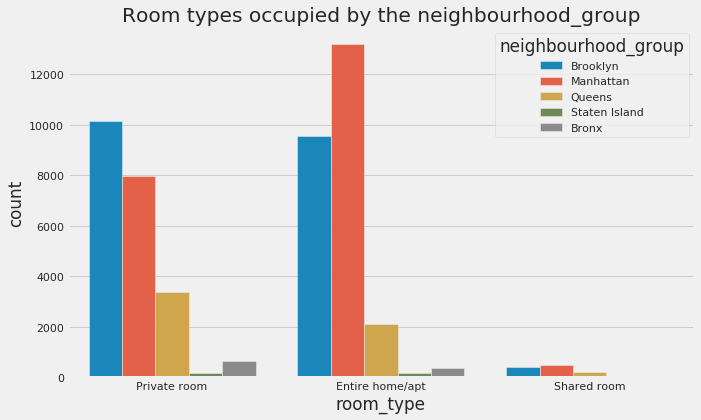

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = data)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

Manhattan has more Apartments abd Shared room.While Brooklyn has more rooms in the private room category.

### Price Vs Nights Scatter Plot

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<Figure size 720x432 with 0 Axes>

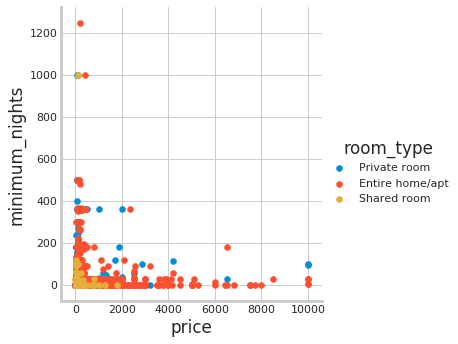

In [34]:
# soure: previous project
plt.figure(figsize=(10,6))
sns.set_style("whitegrid");
sns.FacetGrid(data,hue='room_type',size=5).map(plt.scatter,'price','minimum_nights').add_legend()
plt.ioff()
plt.show()
pass

<Figure size 720x432 with 0 Axes>

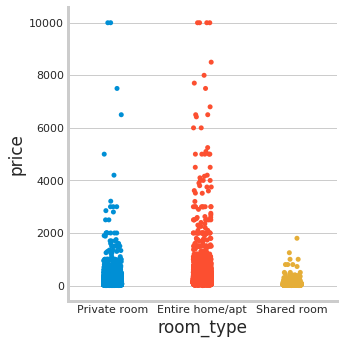

In [35]:
#catplot room type and price
plt.figure(figsize=(10,6))
sns.catplot(x="room_type", y="price", data=data);
plt.ioff()
pass

We can see that rooms with low minimum nights have high price.As mentioned before Home/Apt have the highest price.More people end up staying in apartments.

## G] Reviews

### Word Cloud

<Figure size 720x432 with 0 Axes>

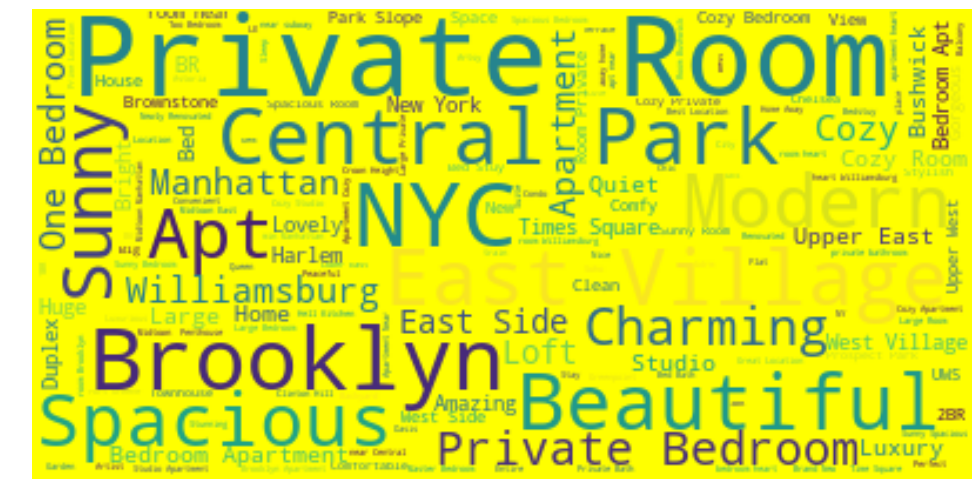

In [36]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in data.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="yellow").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
pass

Our word cloud shows the words that are more often used in the Name of this listings.We can see most of the words are related to the description,place and the experince in the room.

### Bar Plot Most Used Words

In [37]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in data.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [38]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [39]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

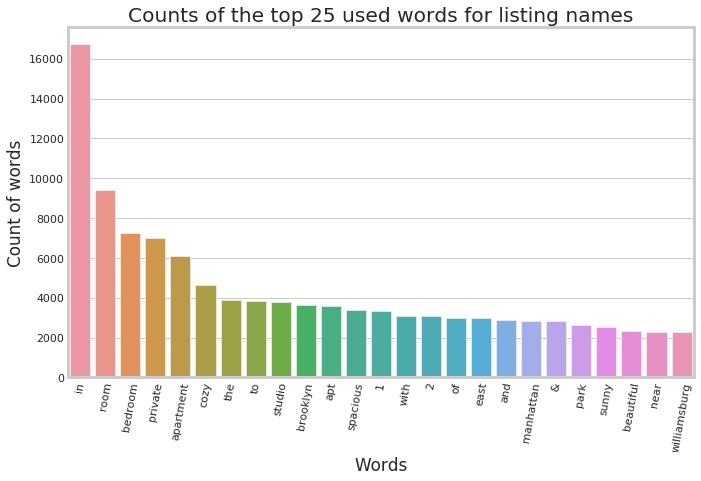

In [40]:
#we are going to use barplot for this visualization
plt.figure(figsize=(10,6))
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80);

We can see that words like room,debroom,private,apartment are used more in the name of the apartments.

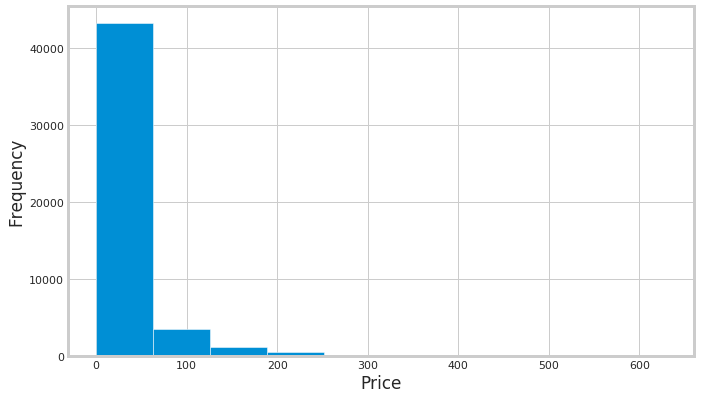

In [41]:
plt.figure(figsize=(10,6))
data['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

We can see that low cost rooms or in range 0-50 $ have more reviews.This shows us that people who pay more for the rooms generally dont write reviews.It is observed people write reviews more if they are not happy with their experience.In case of costly rooms there is high possibility that the customers are happy.So they dont write much reviews.

**Displaying rooms with maximum Reviews**

In [42]:
df1=data.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

id                            name   host_id host_name  \
11759   9145202         Room near JFK Queen Bed  47621202      Dona   
2031     903972      Great Bedroom in Manhattan   4734398        Jj   
2030     903947  Beautiful Bedroom in Manhattan   4734398        Jj   
2015     891117    Private Bedroom in Manhattan   4734398        Jj   
13495  10101135         Room Near JFK Twin Beds  47621202      Dona   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
11759              Queens       Jamaica  40.66730  -73.76831  Private room   
2031            Manhattan        Harlem  40.82085  -73.94025  Private room   
2030            Manhattan        Harlem  40.82124  -73.93838  Private room   
2015            Manhattan        Harlem  40.82264  -73.94041  Private room   
13495              Queens       Jamaica  40.66939  -73.76975  Private room   

       price  minimum_nights  number_of_reviews last_review  \
11759     47               1                629  2019-07-05   
2031      49               1                607  2019-06-21   
2030      49               1                597  2019-06-23   
2015      49               1                594  2019-06-15   
13495     47               1                576  2019-06-27   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173

In [43]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


# 3.Model Built

### Dropping and Replacing Missing Values

In [44]:
# Preparing the data 
data.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
data['reviews_per_month']=data['reviews_per_month'].replace(np.nan, 0)

### Label Encoding

In [45]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(data['neighbourhood_group'])
data['neighbourhood_group']=le.transform(data['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(data['neighbourhood'])
data['neighbourhood']=le.transform(data['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(data['room_type'])
data['room_type']=le.transform(data['room_type'])

data.sort_values(by='price',ascending=True,inplace=True)

data.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
25796   86327101                    1             13  40.68258  -73.91284   
25634   15787004                    1             28  40.69467  -73.92433   
25433  131697576                    0             62  40.83296  -73.88668   
25753    1641537                    1             91  40.72462  -73.94072   
23161    8993084                    1             13  40.69023  -73.95428   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
25796          1      0               1                 95               4.35   
25634          1      0               2                 16               0.71   
25433          1      0               2                 55               2.56   
25753          1      0               2                 12               0.53   
23161          1      0               4                  1               0.05   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

In [46]:
'''Reversing Labeling Transform'''
#list(le.inverse_transform(data['room_type']))[:10]

'Reversing Labeling Transform'

### Linear Regression

In [47]:
'''Train LRM'''
lm = LinearRegression()

X = data[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 4.Model Evaluation

In [48]:
'''Get Predictions & Print Metrics'''
predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts)),
        r2_score(y_test,predicts) * 100,
        mean_absolute_error(y_test,predicts)
        ))


        Mean Squared Error: 180.7340965693626
        R2 Score: 11.63957678232357
        Mean Absolute Error: 72.86091366825617
     


**Actual Vs Predicted for Linear Model**

In [49]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753

### Predicted Vs Actual Plot

In [50]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

### Linear Regression Plot

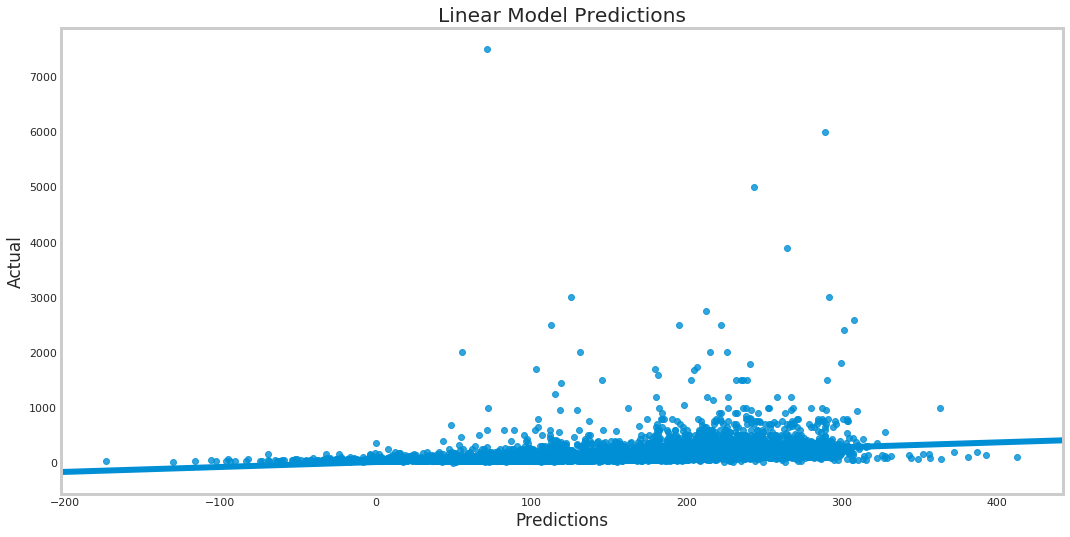

In [51]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.grid(False)
plt.show()

The accuracy of our model gets affected by lot of outliers in our dataset.If we do feature engineering and remove the outliers there is a possibility of improving the accuracy of our models.I wil consider doing feature engineering in coming days.

**Gradient Boosted Regressor Model**

In [52]:
'''Gradient Boosted Regressor'''
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
'''Get Predictions & Metrics'''
predicts2 = GBoost.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, predicts2)),
        r2_score(y_test,predicts2) * 100,
        mean_absolute_error(y_test,predicts2)
        ))


        Mean Squared Error: 175.38343418267524
        R2 Score: 16.793981366641532
        Mean Absolute Error: 63.895511324983374
     


In [54]:
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts2.flatten()}).head(20)

error_airbnb.head(5)

Actual Values  Predicted Values
0            400        125.903567
1            140        156.575618
2            195        161.337522
3            120         94.543442
4             88         71.978409

In [55]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_airbnb.index, y=error_airbnb['Predicted Values']),
    go.Bar(name='Actual', x=error_airbnb.index, y=error_airbnb['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

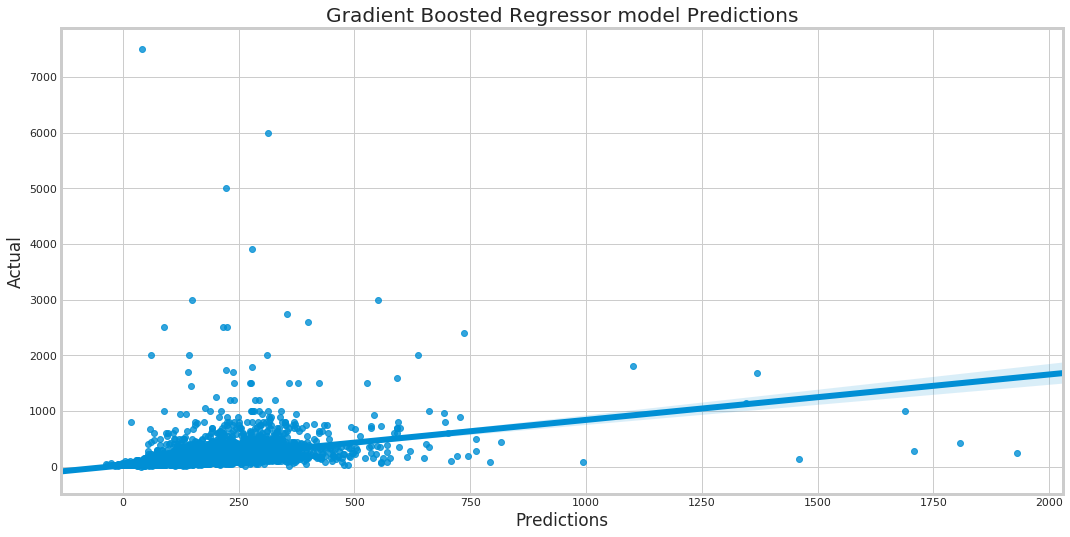

In [56]:
plt.figure(figsize=(16,8))
sns.regplot(predicts2,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Gradient Boosted Regressor model Predictions")
plt.show()

# 5.Conclusion:

1.We have 20% of the missing values in last_review and review_per_month columns.Missing value column have an impact on the price.So to improve our model we need to address this issue.

2.Manhatten and Brooklyn have the highest share of hotels.This we could see with the help of Pie and Bar plot.Additionally to have visual clarity we have plotted scater plot and maps of the neighbourhoods.

3.Manhattan has expensive and Staten Island has low priced rooms.But we can see there are more Price outliers in the Queens,Staten Island and Bronx.We hav categorised the rooms into three categories based on price.0-75,75-500 and 500+ as Low Medium abd High priced rooms.Most of the rooms fall in the Medium (75-200 $) category followed by Low and High range rooms.Very few people prefer to live in high priced rooms.

4.In most cases the rooms are occupied for less than 100 days.But as see from the log scale plot the rooms are occupied from 100 to 1200 days.Some cases the occupancy is in terms of years.We can see clearly that most books are for 1-2-3 days

5.The top 10 neighbourhoods the mean price is in the range 45 to 57 dollars.Mount Eden,Concord and Grant have higher mean prices.Bulls Head, Hunts Point and Tremont are the neighbourhoods with least price.The top neighbourhoods are differnt when we consider Mean and Maximum Prices.Astoria,Greenpoint,SideEast and Harlem have the the most expensive rooms.This could be because these places are posh localities.

6.We can see than most people rent out entire apartment on airbnb followed by private room.This may also be an indicator people go on holidays and stay in airbnb with their family.Also possibility is people are listing more in Entire Apartment category.Very few people opt for shared rooms probably due to lack of privacy.Manhattan has more Apartments abd Shared room.While Brooklyn has more rooms in the private room category.

7.Our word cloud of reviews shows the words that are more often used in the Name of this listings.We can see most of the words are related to the description,place and the experince in the room.We can see that low cost rooms or in range 0-50 $ have more reviews.This shows us that people who pay more for the rooms generally dont write reviews.It is observed people write reviews more if they are not happy with their experience.In case of costly rooms there is high possibility that the customers are happy.So they dont write much reviews.

8.We have used Linear and Gradient Boosting algorithm to predict the price of rooms.We observe higher accuracy is obtained by using Gradient Boosting Algorithm.By doing addition feature engineering it would be possible to further improve accuracy of our model.

# TO BE CONTINUED